# Table of Contents
 <p><div class="lev1"><a href="#How-to-create-and-populate-a-histogram"><span class="toc-item-num">1&nbsp;&nbsp;</span>How to create and populate a histogram</a></div><div class="lev1"><a href="#What-does-a-hist()-fucntion-returns?"><span class="toc-item-num">2&nbsp;&nbsp;</span>What does a hist() fucntion returns?</a></div><div class="lev1"><a href="#Manipulate-The-Histogram-Aesthetics"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manipulate The Histogram Aesthetics</a></div><div class="lev2"><a href="#Number-of-bins"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Number of bins</a></div><div class="lev2"><a href="#Range-of-histogram"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Range of histogram</a></div><div class="lev2"><a href="#Normalizing-your-histogram"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Normalizing your histogram</a></div><div class="lev3"><a href="#Special-Normalize"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Special Normalize</a></div><div class="lev2"><a href="#Weights-of-your-input"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Weights of your input</a></div><div class="lev2"><a href="#Cumulative-histogram"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Cumulative histogram</a></div><div class="lev2"><a href="#Raise-your-histogram-using-bottom"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Raise your histogram using bottom</a></div><div class="lev2"><a href="#Different-draw-types"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Different draw types</a></div><div class="lev2"><a href="#Align-of-the-histogram"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Align of the histogram</a></div><div class="lev2"><a href="#Orientation-of-the-bins"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Orientation of the bins</a></div><div class="lev2"><a href="#Relative-width-of-the-bars"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Relative width of the bars</a></div><div class="lev2"><a href="#Logarithmic-Scale"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Logarithmic Scale</a></div><div class="lev2"><a href="#Color-of-your-histogram"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Color of your histogram</a></div><div class="lev2"><a href="#Label-your-histogram"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Label your histogram</a></div><div class="lev2"><a href="#Stack-multiple-histograms"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Stack multiple histograms</a></div><div class="lev2"><a href="#Add-Info-about-the-data-on-the-canvas"><span class="toc-item-num">3.15&nbsp;&nbsp;</span>Add Info about the data on the canvas</a></div><div class="lev1"><a href="#How-to-fit-a-histogram"><span class="toc-item-num">4&nbsp;&nbsp;</span>How to fit a histogram</a></div><div class="lev2"><a href="#Fit-using-Kernel-Density-Estimation"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fit using Kernel Density Estimation</a></div><div class="lev2"><a href="#Fit-using-Scipy's-Optimize-submodule"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fit using Scipy's Optimize submodule</a></div><div class="lev3"><a href="#Example-of-curve-fit-:"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Example of curve fit :</a></div><div class="lev3"><a href="#Curve-fit-on-histogram"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Curve fit on histogram</a></div><div class="lev2"><a href="#What-about-the-fit-errors?"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>What about the fit errors?</a></div><div class="lev3"><a href="#How-can-I-be-sure-about-my-fit-errors?"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>How can I be sure about my fit errors?</a></div>

# How to create and populate a histogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's generate a data array



In [2]:
data = np.random.rand(500)*1200;

Make a histogram of the data

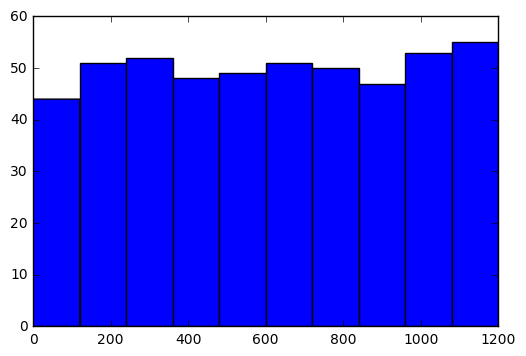

In [3]:
fig = plt.figure();
plt.hist(data)
plt.show()

---
# What does a hist() fucntion returns?

We can use the hist() function and assign it to a tuple of size 3 to get back some information about what the histogram does.

The whole output is :

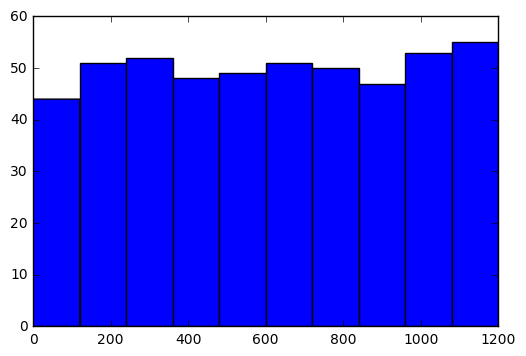

In [4]:
n, my_bins, my_patches = plt.hist(data, bins=10);

In this case:

- **n** : is an array or a list of arrays that hold the **values** of the histogram bins. (Careful in case of the `weights` and/or `normed` options are used.


In [5]:
n
len(n)

10

- **my_bins** : Is an *array*. This holds the edges of the bins. The length of the **my_bins** is **nbins+1** (that is nbins left edges and the right edge of the last bin). This is always a **single array**, even if more than one datasets are passed in.

In [6]:
my_bins

array([  5.64547712e-03,   1.19967390e+02,   2.39929135e+02,
         3.59890880e+02,   4.79852624e+02,   5.99814369e+02,
         7.19776114e+02,   8.39737858e+02,   9.59699603e+02,
         1.07966135e+03,   1.19962309e+03])

- **my_patches** : This is a silent list of the individual patches that are used to create the histogram or list of such list if multiple datasets are plotted.

In [7]:
my_patches

<a list of 10 Patch objects>

----
# Manipulate The Histogram Aesthetics
## Number of bins

Use the `bins=` option.

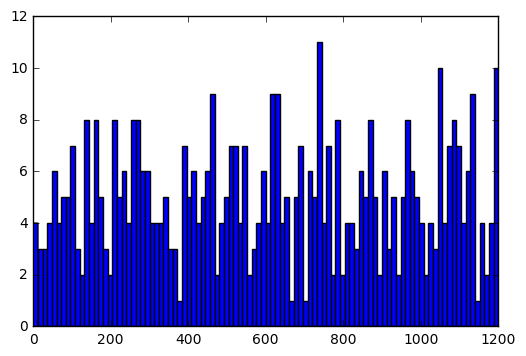

In [8]:
plt.hist(data, bins=100);

----


## Range of histogram

Use the `range=(tuple)` option


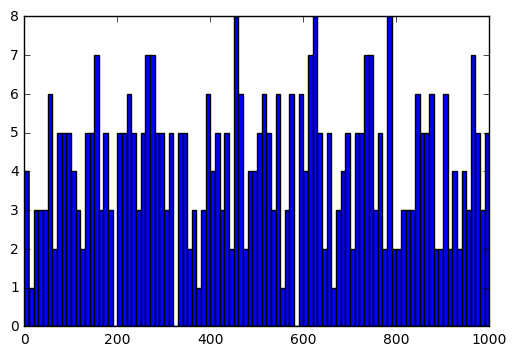

In [9]:
plt.hist(data, bins=100, range=(0,1000));

----


## Normalizing your histogram

To normalize a histogram use the `normed=True` option.


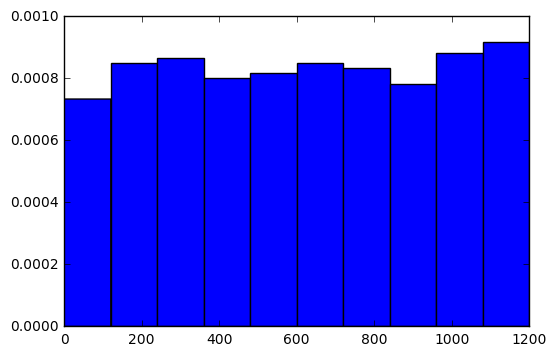

In [10]:
plt.hist(data, normed=True);

This assures that the integral of the distribution is equal to unity. 

**If `stacked` is also True, the sum of the histograms is normalized to 1.**


----


### Special Normalize
However, sometimes it is useful to visualize the height of the bins to sum up to unity.
For this we generate weights for the histogram. Each bin has the weight: ** 1/(number of data points) **

N.B. : Using this technique you **MUST NOT USE** the `normed=True` option.

This way adding up the bars will give you 1.

In [11]:
weights = np.ones_like(data)/len(data);

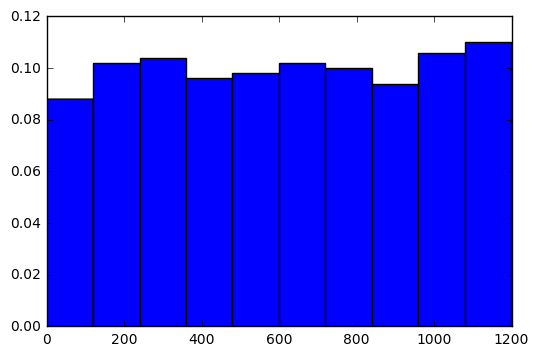

In [12]:
plt.hist(data, weights=weights);  ## We have NOT used the normed = True option

----


## Weights of your input

To weight your data use the `weights=(array)` option.

The weights array **must be of the same shape of the data provided**.
Each data point provided in the data array only contributes its associated weight towards the bin count (instead of 1)

If you also use **normed=True** the weights will be normalized so that the integral of the density over the range is unity.

Again, sometimes it is useful to visualize the height of the bins to sum up to unity.
For this we generate weights for the histogram. Each bin has the weight: ** 1/(number of data points) **

N.B. : Using this technique you **MUST NOT USE** the `normed=True` option.

This way adding up the bars will give you 1.


In [13]:
weights = np.ones_like(data)/len(data);

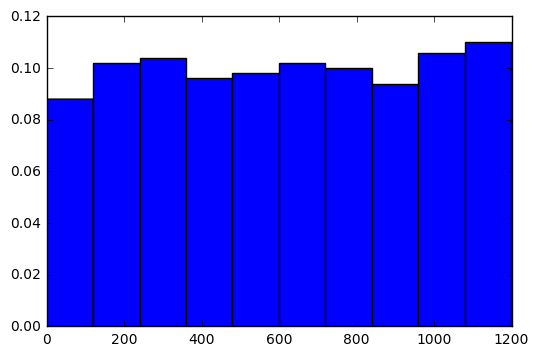

In [14]:
plt.hist(data, weights=weights);

----


## Cumulative histogram

This is to create the cumulative histogram. Use cimulative=True, so that now each bin has its counts and also all the counts of the previous bins.

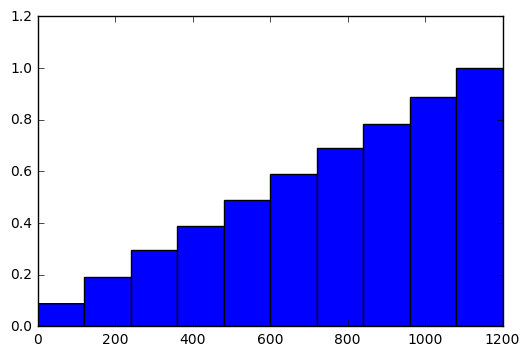

In [15]:
plt.hist(data, weights=weights, cumulative=True);

----


## Raise your histogram using bottom


You can raise your histogram by adding either a scalar (fixed) amount on your y-axis, or even an array-like raise.
To do this use the `bottom=(array,scalar,None)` option

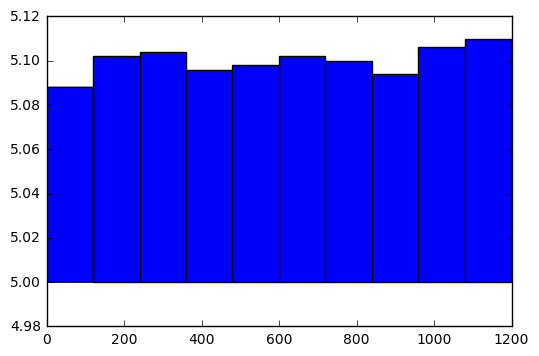

In [16]:
plt.hist(data, weights=weights, bottom=5);

In [17]:
nbins = 10
bot = 5*np.random.rand(nbins)

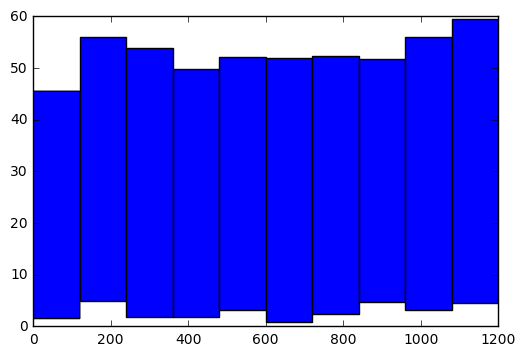

In [18]:
plt.hist(data, bins=nbins, bottom=bot);

----


## Different draw types

Use the `histtype=` option for other draw options of your histogram. Basics are:

- bar  -> Traditional bar type histogram

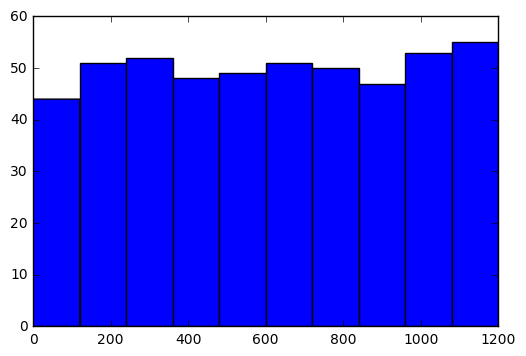

In [19]:
plt.hist(data, bins=nbins,histtype='bar');

- barstacked -> bar-type where multiple data are stacked on-top of the other

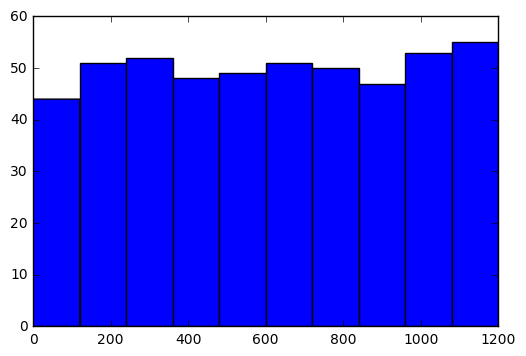

In [20]:
plt.hist(data, bins=nbins,histtype='barstacked');

- step -> To create the line plot only

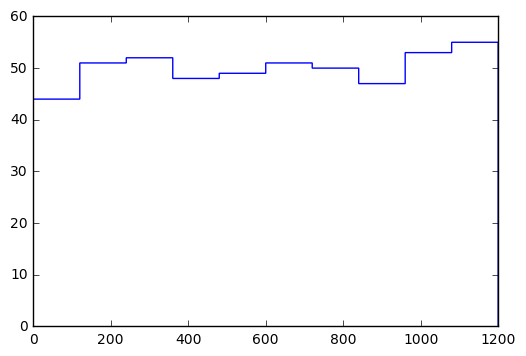

In [21]:
plt.hist(data, bins=nbins,histtype='step');

- stepfilled  ->  to create the step but also fill it (similar to bar but without the vertical lines)

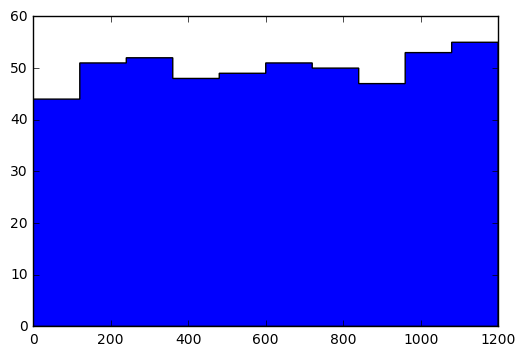

In [22]:
plt.hist(data, bins=nbins,histtype='stepfilled');

----


## Align of the histogram

One can use the `align='left'|'mid'|'right'` option

- 'left' -> bars are centered on the left bin edges

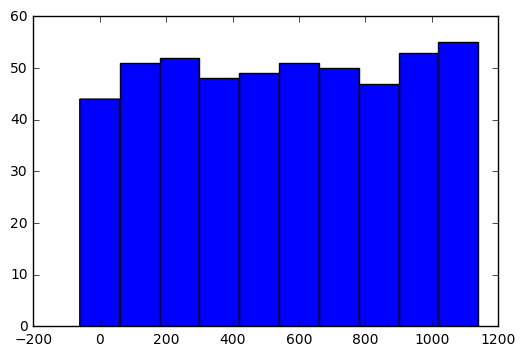

In [23]:
plt.hist(data, align='left');

- 'mid' -> bars centered between bin edges

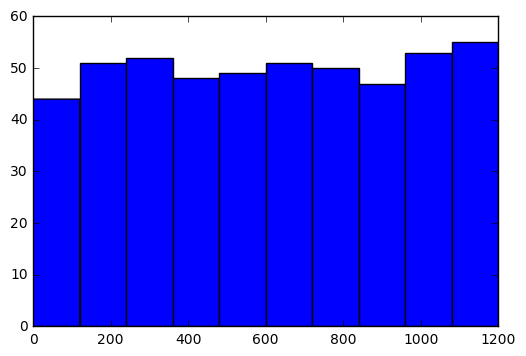

In [24]:
plt.hist(data, align='mid');

- 'right' -> guess...

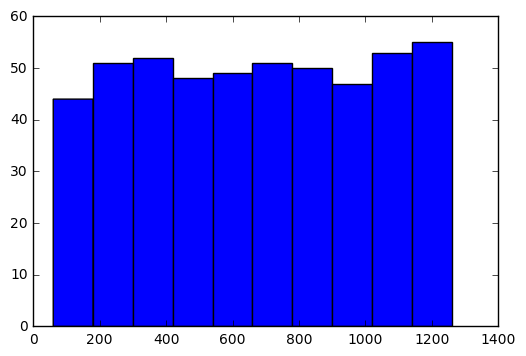

In [25]:
plt.hist(data, align='right');

----


## Orientation of the bins

You can orient the histogram vertical or horizontal using the `orientation` option.

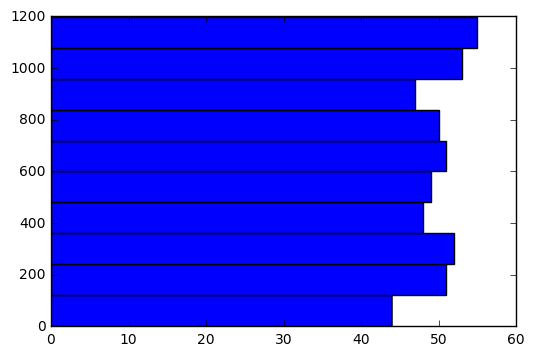

In [26]:
plt.hist(data, orientation="horizontal");

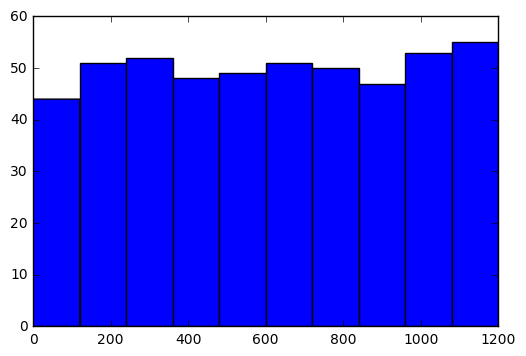

In [27]:
plt.hist(data, orientation="vertical");

----


## Relative width of the bars

The option `rwidth=(scalar,None)` defines the relative width of the bars as a fraction of the bin width. If None (default) automatically computes the width.



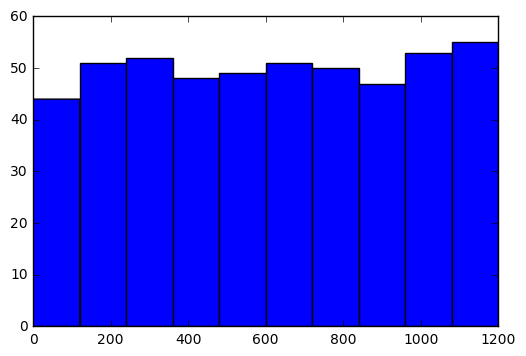

In [28]:
plt.hist(data);

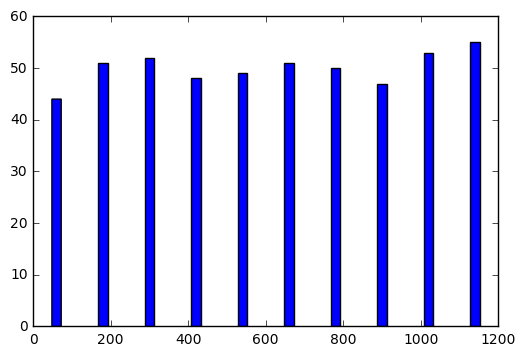

In [29]:
plt.hist(data, rwidth=0.2);

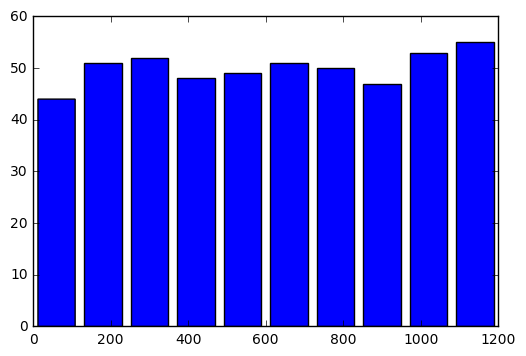

In [30]:
plt.hist(data, rwidth=0.8);

----


## Logarithmic Scale

To enable the logarithmic scale use the `log=True` option.  The histogram axis will be set to log scale. For logarithmic histograms, empty bins are filtered out.


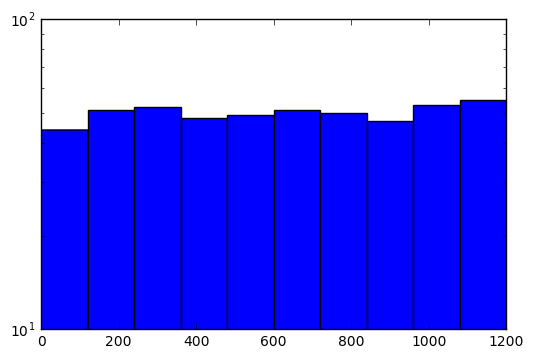

In [31]:
plt.hist(data, log=True);

----


## Color of your histogram

You can use the presets or array_like of colors.

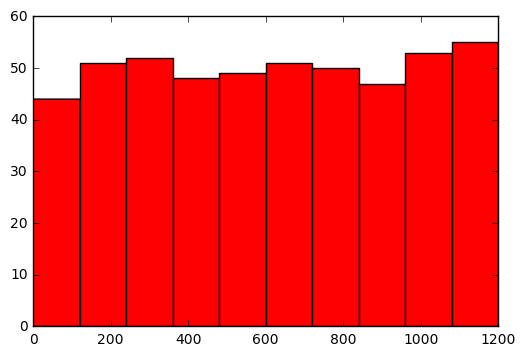

In [32]:
plt.hist(data, color='red');

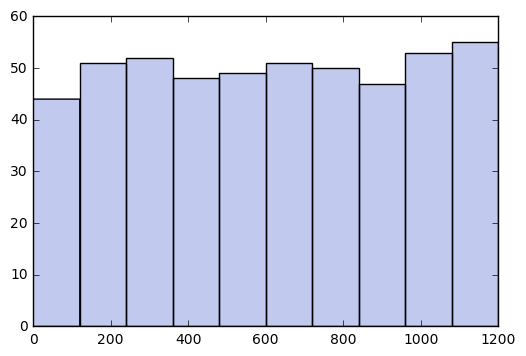

In [33]:
plt.hist(data, color=[0.2, 0.3, 0.8, 0.3]); # RGBA

----


## Label your histogram

Use the `label=string` option. This takes a string or a sequence of strings.


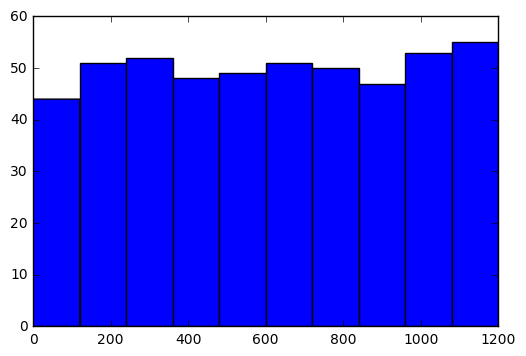

In [34]:
plt.hist(data, label="Histogram");

---


## Stack multiple histograms


To stack more than one histogram use the `stacked=True` option.

If True multiple data are stacked on top of each other, otherwise, if False multiple data are aranged side by side (or on-top of each other)

In [35]:
data2 = np.random.rand(500)*1300;

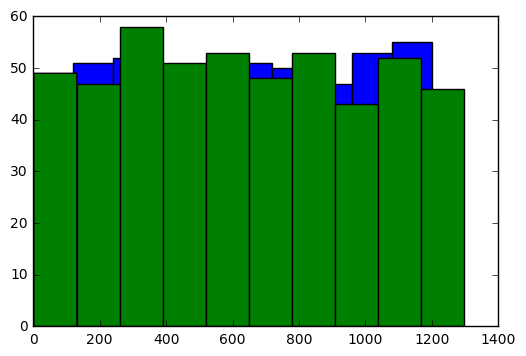

In [36]:
plt.hist(data, stacked=True);
plt.hist(data2, stacked=True);

## Add Info about the data on the canvas

First of all we can get the mean, median, std of the data plotted and add them on the canvas

In [37]:
entries = len(data);
mean = data.mean();
stdev = data.std();

Then create the string and add these values

In [38]:
textstr = 'Entries=$%i$\nMean=$%.2f$\n$\sigma$=$%.2f$'%(entries, mean, stdev)

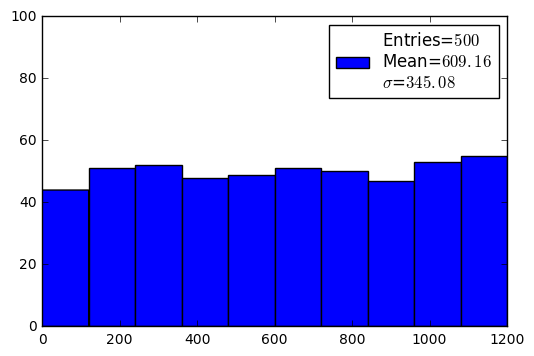

In [39]:
plt.hist(data, label=textstr);
plt.ylim(0,100);
plt.legend(loc='best',markerscale=0.01);

Or using a textbox...


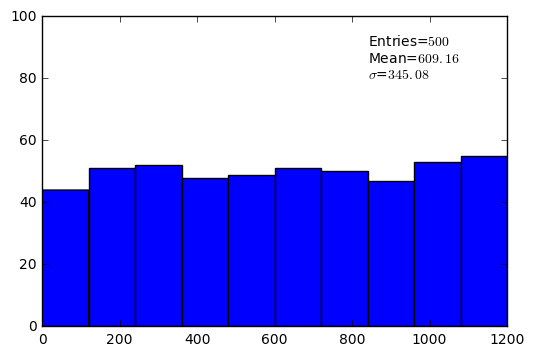

In [40]:
plt.hist(data);
plt.ylim(0,100);
#plt.text(800,80,textstr);
plt.annotate(textstr, xy=(0.7, 0.8), xycoords='axes fraction') # annotate for specifying the
                                                                # fraction of the canvas

----


# How to fit a histogram

Let's generate a normal distribution

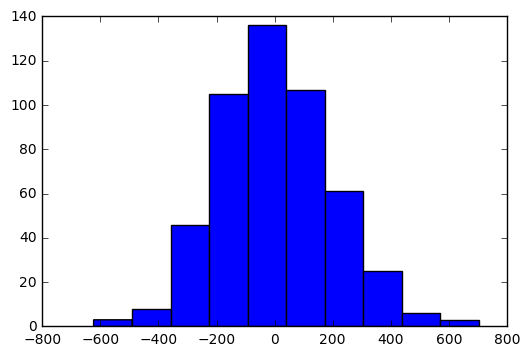

In [41]:
fit_data = np.random.randn(500)*200;
plt.hist(fit_data);

Assume now that seeing these data we think that a gaussian distribution will fit the best on the given dataset.

We load the gaussian (normal) distribution from scipy.stats:

In [42]:
from scipy.stats import norm

Now, looking at this function `norm` we see it has the `loc` option and the `scale` option.

** `loc` is the mean value and `scale` the standard deviation**

To fit a gaussian on top of the histogram, we need the **normed** histogram and also to get the mean and std of the gaussian that fits the data. Therefore we have

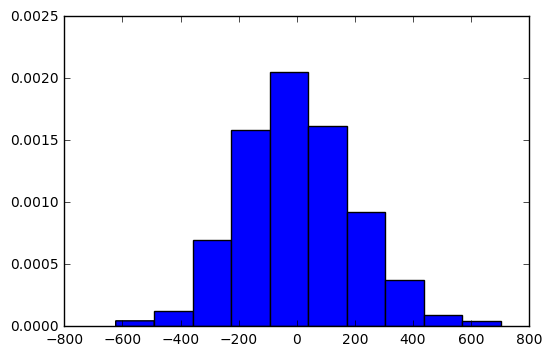

In [43]:
plt.hist(fit_data, normed=True);

In [44]:
mean, std = norm.fit(fit_data);

In [45]:
mean

0.82013770997502522

In [46]:
std

198.59198168540044

Then we create the curve for that using the norm.pdf in the range of fit_data.min() and fit_data.max()

In [47]:
x = np.linspace(fit_data.min(), fit_data.max(), 1000);

In [48]:
fit_gaus_func = norm.pdf(x, mean, std);

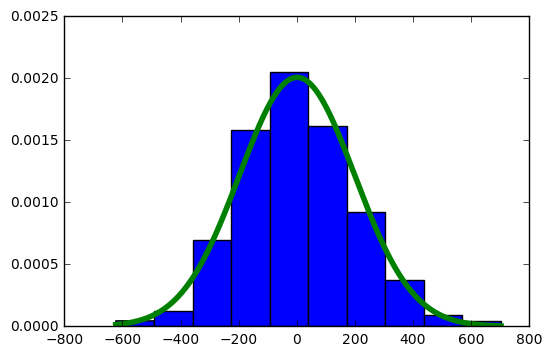

In [49]:
plt.hist(fit_data, normed=True);
plt.plot(x,fit_gaus_func, lw=4);

## Fit using Kernel Density Estimation

Instead of specifying a distribution we can fit the best probability density function. This can be achieved thanks to the non-parametric techique of **kernel density estimation**.

KDE is a non parametric way to estimate the probability density function of a random variable. 

**How it works?**
Suppose $(x_1, x_2, ..., x_n)$ are i.i.d. with unknown density $f$. We want to estimate the shape of this function $f$. Its kernel density estimator is 

$ \hat{f}_{h}(x) = \frac{1}{n} \sum_{i=1}^{n}(x-x_i) = \frac{1}{nh}\sum_{i=1}^{n}K\left(\frac{x-x_i}{h}\right)$

where the $K()$ is the kernel. Kernel is a non-negative function that intergrates to one and has mean zero, also h>0 is a smoothing parameter called **bandwidth**.
A kernel with a subscript h is called a **scaled kernel** and is defined as $K_h(x)=\frac{1}{h}K(\frac{x}{h})$. 
Usually one wants to use small $h$, but is always a trade of between the bias of the estimator and its variance.

Kernel functions commonly used: 
    - uniform    
    - triangular
    - biweight
    - triweight
    - Epanechinikov
    - normal 
More under https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use


In python this is done using the ** scipy.stats.kde ** submodule.
For gaussian kernel density estimation we use the gaussian kde

In [50]:
from scipy.stats import gaussian_kde
pdf_gaus = gaussian_kde(fit_data);
pdf_gaus

In [51]:
pdf_gaus = pdf_gaus.evaluate(x);  # get the "y" values from the pdf for the "x" axis, this is an array

In [52]:
pdf_gaus

array([  2.71474858e-05,   2.75296549e-05,   2.79099491e-05,
         2.82882584e-05,   2.86644779e-05,   2.90385082e-05,
         2.94102550e-05,   2.97796295e-05,   3.01465484e-05,
         3.05109343e-05,   3.08727151e-05,   3.12318249e-05,
         3.15882032e-05,   3.19417956e-05,   3.22925537e-05,
         3.26404347e-05,   3.29854020e-05,   3.33274251e-05,
         3.36664792e-05,   3.40025458e-05,   3.43356123e-05,
         3.46656722e-05,   3.49927249e-05,   3.53167761e-05,
         3.56378375e-05,   3.59559268e-05,   3.62710678e-05,
         3.65832905e-05,   3.68926310e-05,   3.71991315e-05,
         3.75028404e-05,   3.78038122e-05,   3.81021079e-05,
         3.83977945e-05,   3.86909455e-05,   3.89816406e-05,
         3.92699663e-05,   3.95560152e-05,   3.98398868e-05,
         4.01216872e-05,   4.04015292e-05,   4.06795328e-05,
         4.09558247e-05,   4.12305388e-05,   4.15038165e-05,
         4.17758063e-05,   4.20466647e-05,   4.23165556e-05,
         4.25856511e-05,

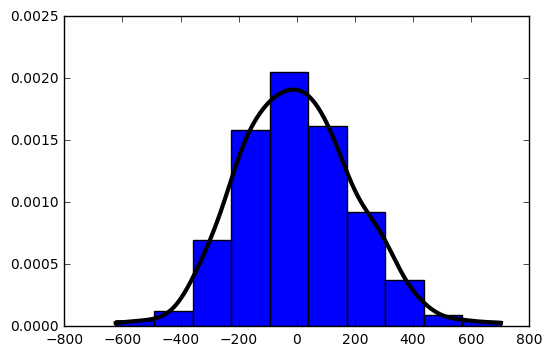

In [53]:
plt.hist(fit_data, normed=1);
plt.plot(x, pdf_gaus, 'k', lw=3)


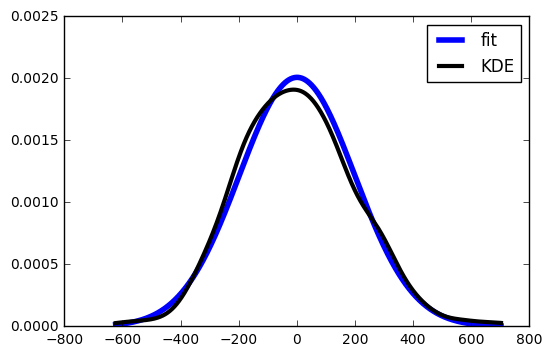

In [54]:
plt.plot(x,fit_gaus_func, lw=4, label="fit");
plt.plot(x, pdf_gaus, 'k', lw=3, label="KDE");
plt.legend();

**N.B.: ** Notice the difference in the two fit curves! This comes from the fact that the Gaussian kernel is a mixture of normal distrubutions; a Gaussian mixture may be skew or heavy-, light-tailed or multimodal. Thus it does not assume the original distrubution of any particular form.


## Fit using Scipy's Optimize submodule


Scipy comes with an [optimize submodule](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) that provides several commonly used optimization algorithms.

One of the easiest is [curve_fit](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.curve_fit.html), which uses non-linear least squares to fit a function $f$ to the data. It assumes that :

$ y_{data} = f(x_{data}, *params) + eps$

The declaration of the function is :

scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)

where 
- f : model function (callable) f(x, ... ) the independent variable must be its first argument
- xdata : sequence or array (array (k,M) when we have multiple funcitons with k predictors)
- ydata : sequence of dependent data
- p0 : initial guess for the parameters
- sigma : if it is not set to None this provides the uncertainties in the ydata array. These are used as weights in the LSquere problem, i.e. minimizing : $\sum{\left(\frac{f(xdata, popt)-ydata}{sigma}\right)^2}$. If set to None, uncertainties are assumed to be 1.
-absolute_sigma : (bool) When False, sigma denotes relative weights of datapoints. The returned covariance matrix is based on **estimated** errors in the data and is **not** affected by the overall magnitude of the values in *sigma*. Only the relative magnitudes of the *sigma* values matter. If true, then *sigma* describes one standard deviation errors of the input data points. The estimated covariance in pcov is based on these values.
- method : 'lm', 'trf', 'dogbox' (**N.B.:** lm does not work when the number of observations is less than the number of variables)



The function returns 
- popt : array of optimal values for the parameters so that the sum of the squared error of $f(xdata, popt)-ydata$ is minimized

- pcov : the covariance matrix of popot. To compute one standard deviation errors on the parameters use :
$$ perr = np.sqrt(np.diag(pcov)) $$


Errors raised by the module:
- ValueError : if there are any NaN's or incompatible options used
- RuntimeError : if least squares minimization fails 
- OptimizeWarning : if covariance of the parameters cannot be estimated.



### Example of curve fit :

In [55]:
from scipy.optimize import curve_fit

## define the model function:
def func(x, a,b,c):
    return a*np.exp(-b*x)+c

## the x-points
xdata = np.linspace(0,4,50);

## get some data from the model function...
y = func(xdata, 2.5, 1.3, 0.5)

##and then add some gaussian errors to generate the "data"
ydata = y + 0.2*np.random.normal(size=len(xdata))

In [56]:
## now run the curve_fit()
popt, pcov = curve_fit(func, xdata, ydata)

In [57]:
popt

array([ 2.21865978,  1.33348349,  0.58840873])

In [58]:
pcov

array([[ 0.0155489 ,  0.00750671, -0.00077657],
       [ 0.00750671,  0.02584644,  0.00621311],
       [-0.00077657,  0.00621311,  0.00286014]])

In [59]:
### To constrain the optimization to the region of 0<a<3.0 , 0<b<2 and 0<c<1
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))

In [60]:
popt

array([ 2.21866033,  1.33348536,  0.58840918])

In [61]:
pcov

array([[ 0.01554872,  0.00750645, -0.00077659],
       [ 0.00750645,  0.02584589,  0.00621318],
       [-0.00077659,  0.00621318,  0.00286022]])



### Curve fit on histogram

To use curve_fit on a histogram we need to get the bin heights and model the histogram as a set of data points. One way to do it is to take the height of the center bin as (x,y) datapoints.



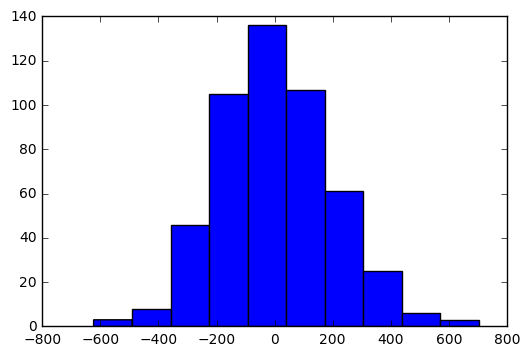

In [62]:
### Start with the histogram, but now get the values and binEdges
n,bins,patches = plt.hist(fit_data, bins=10);

In [63]:
n

array([   3.,    8.,   46.,  105.,  136.,  107.,   61.,   25.,    6.,    3.])

In [64]:
bins

array([-623.09381041, -490.53113569, -357.96846098, -225.40578626,
        -92.84311154,   39.71956318,  172.28223789,  304.84491261,
        437.40758733,  569.97026205,  702.53293676])

In [65]:
### Calculate the bin centers as (bins[1:]+bins[:-1])/2
binCenters = 0.5 * (bins[1:] + bins[:-1]); # we throw away the first (in the first) and last (in the second) edge
binCenters

array([-556.81247305, -424.24979834, -291.68712362, -159.1244489 ,
        -26.56177418,  106.00090053,  238.56357525,  371.12624997,
        503.68892469,  636.2515994 ])

In [66]:
## function to model is a gaussian:
def func_g(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

## xdata are the centers, ydata are the values
xdata = binCenters
ydata = n

popt, pcov = curve_fit(func_g, xdata, ydata, p0=[1, ydata.mean(), ydata.std()])#,diag=(1./xdata.mean(),1./ydata.mean())) # setting some initial guesses to "help" the minimizer

In [67]:
popt

array([ 134.75985608,  -11.30784948,  195.28577603])

In [68]:
pcov

array([[  1.08245601e+01,   1.67054681e-03,  -1.04615549e+01],
       [  1.67054681e-03,   3.03045979e+01,  -5.29893108e-03],
       [ -1.04615549e+01,  -5.29893108e-03,   3.03217877e+01]])

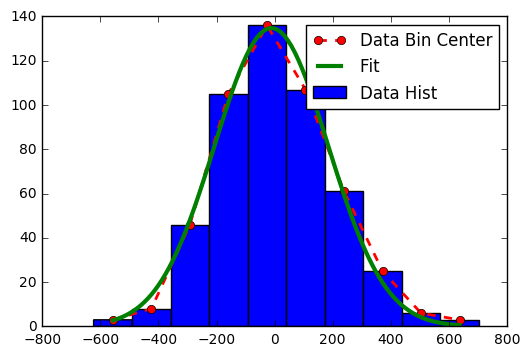

In [74]:
plt.plot(xdata,ydata, "ro--", lw=2, label="Data Bin Center");
plt.hist(fit_data, bins=10, label="Data Hist");
plt.plot(np.linspace(xdata.min(),xdata.max(),100), 
         func_g(np.linspace(xdata.min(),xdata.max(),100),popt[0],popt[1],popt[2]), 
         "g-", lw=3, label="Fit");  # I increased the x axis points to have smoother curve

plt.legend();

## What about the fit errors?

To get the standard deviation of the parameters simply get the square root of the sum of the diagonal elements of the covariance matrix.



In [77]:
errors = []
for i in range(len(popt)):
    try:
        errors.append(np.absolute(pcov[i][i])**0.5)
    except:
        errors.append(0.00)

In [78]:
for i in range(len(popt)):
    print popt[i],"+/-",errors[i]

134.759856082 +/- 3.29006992176
-11.3078494807 +/- 5.50496121037
195.285776031 +/- 5.50652229064


However this works when using curve_fit.

The `optimize.leastsq` method will return the fractional covariance matrix. We have to multiply the elements of this matrix by the residual variance (the reduced chi squared) and then take the square root of the diagonal elements, to get an estimate of the standard deviation of the fit parameters.

### How can I be sure about my fit errors?

To get the proper estimate of the standard error in the fitted parameters is a complicated statistical problem. In detail, the resulting covariance matrix of the optimize.leastsq and optimize.curve_fit, is based on the assumptions regarding the probability distribution of the errors and the interactions between parameters; these interaction may exist depending on the specific fit function $f(x)$. A good way to deal with a complicated $f(x)$ is to use the [bootstrap method](http://phe.rockefeller.edu/LogletLab/whitepaper/node17.html).